In [31]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def get_sp500_tickers():
    # Fetch the list of S&P 500 components from a reliable source
    # Here, we're using a CSV file available on GitHub
    sp500_tickers_url = "https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv"
    sp500_tickers_df = pd.read_csv(sp500_tickers_url)
    return sp500_tickers_df['Symbol'].tolist()

def get_monthly_stock_data(tickers, start_date, end_date):
    stock_data = yf.download(tickers, start=start_date, end=end_date, interval='1mo')['Adj Close']
    return stock_data

# Get S&P 500 tickers
sp500_tickers = get_sp500_tickers()
sp500_tickers.append('SPY')

# Define the date range
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')

# Set the date range
start_date = "2018-01-01"
end_date = "2023-12-31"


# Fetch monthly stock data for the S&P 500
sp500_data = get_monthly_stock_data(sp500_tickers, start_date, end_date)

[*********************100%***********************]  504 of 504 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1mo 2018-01-01 -> 2023-12-31)')


In [63]:
# remove delisted stocks and stocks that were listed later than start_date
stocks = sp500_data.bfill(limit=1).dropna(axis=1)

# remove time from date-time indexing
# stocks.index = [i.date().strftime('%Y-%m-%d') for i in stocks.index.values]

stocks = stocks.pct_change().dropna()

stocks.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-01 00:00:00,-0.065913,-0.001289,0.063847,0.039573,-0.024799,-0.029690,0.001929,0.046906,-0.018829,-0.033295,...,0.011535,-0.051709,-0.132417,-0.078112,0.032106,-0.037947,-0.085510,0.121630,0.017398,0.055557
2018-03-01 00:00:00,-0.024639,-0.040370,-0.054210,-0.182854,-0.006796,-0.030032,-0.046643,0.033233,0.010871,0.052720,...,0.092032,0.050832,-0.004846,-0.102569,0.034361,0.050926,-0.062022,0.007601,-0.037043,0.032773
2018-04-01 00:00:00,-0.017339,-0.173787,-0.015020,0.020074,-0.029873,-0.063793,-0.014984,0.025546,-0.036492,0.046345,...,0.021003,0.038977,0.042085,0.002359,-0.052262,0.023141,0.058560,-0.031324,0.038309,-0.000359
2018-05-01 00:00:00,-0.056005,0.014209,0.130764,0.035368,0.063585,-0.020966,0.039116,0.124910,0.112536,-0.036580,...,0.052742,-0.028181,0.044888,-0.129718,-0.034294,-0.066246,-0.031779,0.138545,0.001096,0.004107
2018-06-01 00:00:00,-0.001292,-0.126119,-0.005598,-0.063574,-0.008776,0.011855,0.050405,-0.021943,-0.012966,0.056229,...,-0.142901,0.003515,0.028662,-0.000913,-0.040101,-0.034080,-0.000628,-0.066836,-0.034673,0.017802


In [78]:
# calculate the variance-covariance matrix `sigma`
SIGMA = stocks.cov()
SIGMA.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0.006047,0.004433,0.002924,0.002595,0.002851,0.002036,0.003659,0.003520,0.003976,0.002630,...,0.005053,0.001457,0.002592,0.003566,0.004499,0.003081,0.003469,0.005720,0.003976,0.002922
AAL,0.004433,0.017299,0.004746,0.002300,0.002333,0.003677,0.004306,0.004478,0.006826,0.004235,...,0.011345,0.000245,0.006246,0.004764,0.005353,0.003551,0.004581,0.008690,0.008261,0.002323
AAPL,0.002924,0.004746,0.008010,0.000924,0.002262,0.001511,0.004295,0.005449,0.003387,0.002520,...,0.004609,0.001145,0.002218,0.001891,0.003011,0.002770,0.002870,0.006516,0.002360,0.002911
ABBV,0.002595,0.002300,0.000924,0.006663,0.001001,0.001789,0.002307,0.001068,0.002177,0.001496,...,0.004002,-0.000060,0.001782,0.002093,0.001479,0.001515,0.001891,0.003009,0.003163,0.001116
ABT,0.002851,0.002333,0.002262,0.001001,0.003466,0.000482,0.002264,0.002194,0.002080,0.001279,...,0.003048,0.001297,0.001417,0.002277,0.002680,0.002436,0.002766,0.003462,0.001503,0.002090


### Capital Market Line Model

$$R_s = r_f + \beta_{s,m} (R_m - r_f),$$

Where:
- $R_s$ is the expected stock return
- $r_f$ is the risk free rate (using treasury bills here)
- $\beta_{s,m}$ is the $\beta$ of the stock $s$ related to the market $m$ (using the S&P500 here)
- $R_m$ is the expected market return

In [108]:
# Now, use the capital market line to estimate returns

# Obtain treasury bill rates, use as risk free rate
risk_free_rate = get_monthly_stock_data('^IRX', start_date, end_date) / 100
risk_free_rate = risk_free_rate.iloc[1:]

[*********************100%***********************]  1 of 1 completed


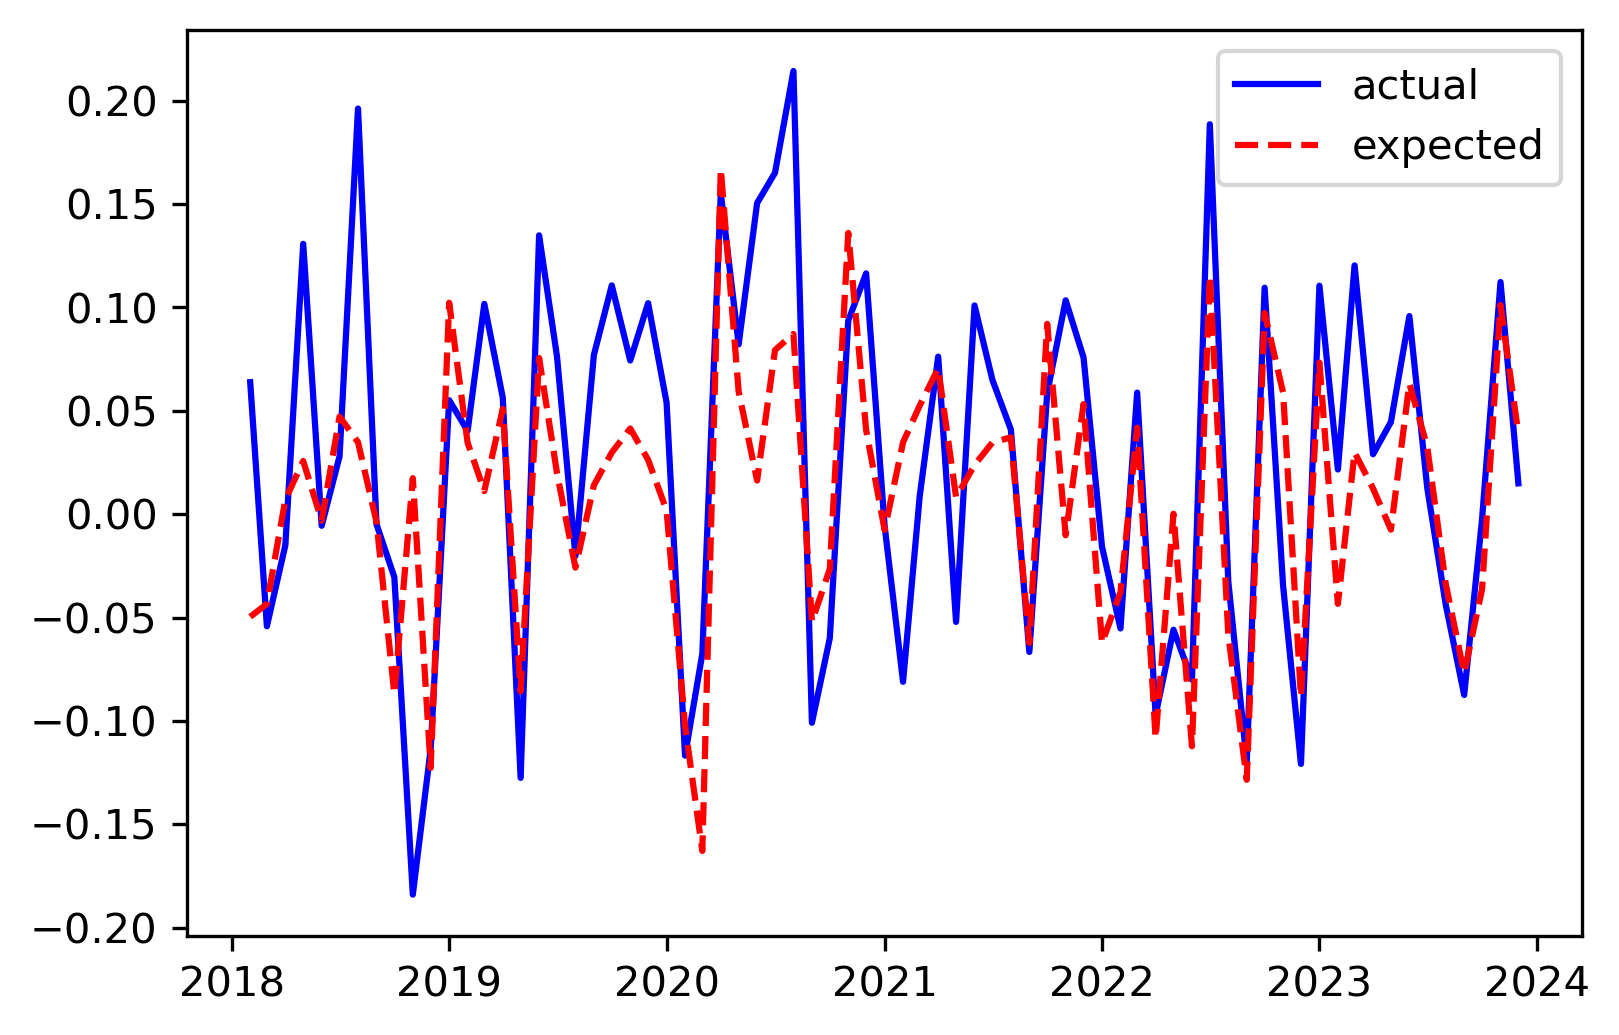

Correlation is 0.7280684104627765 
p-value is 6.283659977260711e-13


In [182]:
# demonstration with APPLE

import matplotlib.pyplot as plt


stock = "AAPL"

beta = np.cov(stocks[stock], stocks["SPY"])[0,1] / np.var(stocks["SPY"])
PI_stock = risk_free_rate + beta * (stocks["SPY"] - risk_free_rate)


plt.figure(dpi=300)

plt.plot(stocks[stock], "b", label="actual")
plt.plot(PI_stock,"--r", label="expected")

plt.legend()
plt.show()

from scipy.stats import spearmanr

corr, p_value = spearmanr(PI_stock,stocks[stock])
print("Correlation is", corr, "\np-value is", p_value)

In [119]:
corr, p_value = spearmanr(PI.shift(1).dropna(),stocks[stock].iloc[1:])
print("Correlation is", corr, "\np-value is", p_value)

Correlation is -0.018948473449392003 
p-value is 0.8762744441594958


In [177]:
# calculate the beta for each stock and store it in a dataframe
betas = {i: np.ones(len(stocks["SPY"])) * np.cov(stocks[i], stocks["SPY"])[0,1]/np.var(stocks["SPY"]) for i in stocks.columns}
betas = pd.DataFrame(data = betas, index=stocks["SPY"].index)
# implement the CML model
PI = betas.mul(stocks["SPY"] - risk_free_rate, axis=0).add(risk_free_rate, axis=0)


In [226]:
PI.index(date)

TypeError: 'Index' object is not callable

In [228]:
SIGMA

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0.006047,0.004433,0.002924,0.002595,0.002851,0.002036,0.003659,0.003520,0.003976,0.002630,...,0.005053,0.001457,0.002592,0.003566,0.004499,0.003081,0.003469,0.005720,0.003976,0.002922
AAL,0.004433,0.017299,0.004746,0.002300,0.002333,0.003677,0.004306,0.004478,0.006826,0.004235,...,0.011345,0.000245,0.006246,0.004764,0.005353,0.003551,0.004581,0.008690,0.008261,0.002323
AAPL,0.002924,0.004746,0.008010,0.000924,0.002262,0.001511,0.004295,0.005449,0.003387,0.002520,...,0.004609,0.001145,0.002218,0.001891,0.003011,0.002770,0.002870,0.006516,0.002360,0.002911
ABBV,0.002595,0.002300,0.000924,0.006663,0.001001,0.001789,0.002307,0.001068,0.002177,0.001496,...,0.004002,-0.000060,0.001782,0.002093,0.001479,0.001515,0.001891,0.003009,0.003163,0.001116
ABT,0.002851,0.002333,0.002262,0.001001,0.003466,0.000482,0.002264,0.002194,0.002080,0.001279,...,0.003048,0.001297,0.001417,0.002277,0.002680,0.002436,0.002766,0.003462,0.001503,0.002090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.003081,0.003551,0.002770,0.001515,0.002436,0.002042,0.003220,0.002507,0.003007,0.002060,...,0.005716,0.001890,0.003025,0.003646,0.003452,0.005197,0.003883,0.004515,0.002581,0.002799
ZBH,0.003469,0.004581,0.002870,0.001891,0.002766,0.002873,0.002885,0.002426,0.003456,0.002839,...,0.006710,0.001550,0.003998,0.004277,0.003766,0.003883,0.006533,0.004520,0.003255,0.002413
ZBRA,0.005720,0.008690,0.006516,0.003009,0.003462,0.001717,0.005468,0.006107,0.006633,0.002961,...,0.010615,0.000809,0.004407,0.003922,0.005167,0.004515,0.004520,0.014418,0.007106,0.004640
ZION,0.003976,0.008261,0.002360,0.003163,0.001503,0.002661,0.002941,0.002301,0.005007,0.003795,...,0.009687,0.000332,0.005143,0.003962,0.003105,0.002581,0.003255,0.007106,0.013875,0.002518


In [249]:
weights = []
for date_index in range(len(stocks["SPY"])):
    date = stocks["SPY"].index[date_index]
    weights.append(                                 np.matmul(np.linalg.inv(SIGMA), PI.iloc[date_index]) / 
                   np.ones(len(stocks.columns)).dot(np.matmul(np.linalg.inv(SIGMA), PI.iloc[date_index])))
    
weights = pd.DataFrame(weights, index=stocks["SPY"].index, columns = stocks.columns)

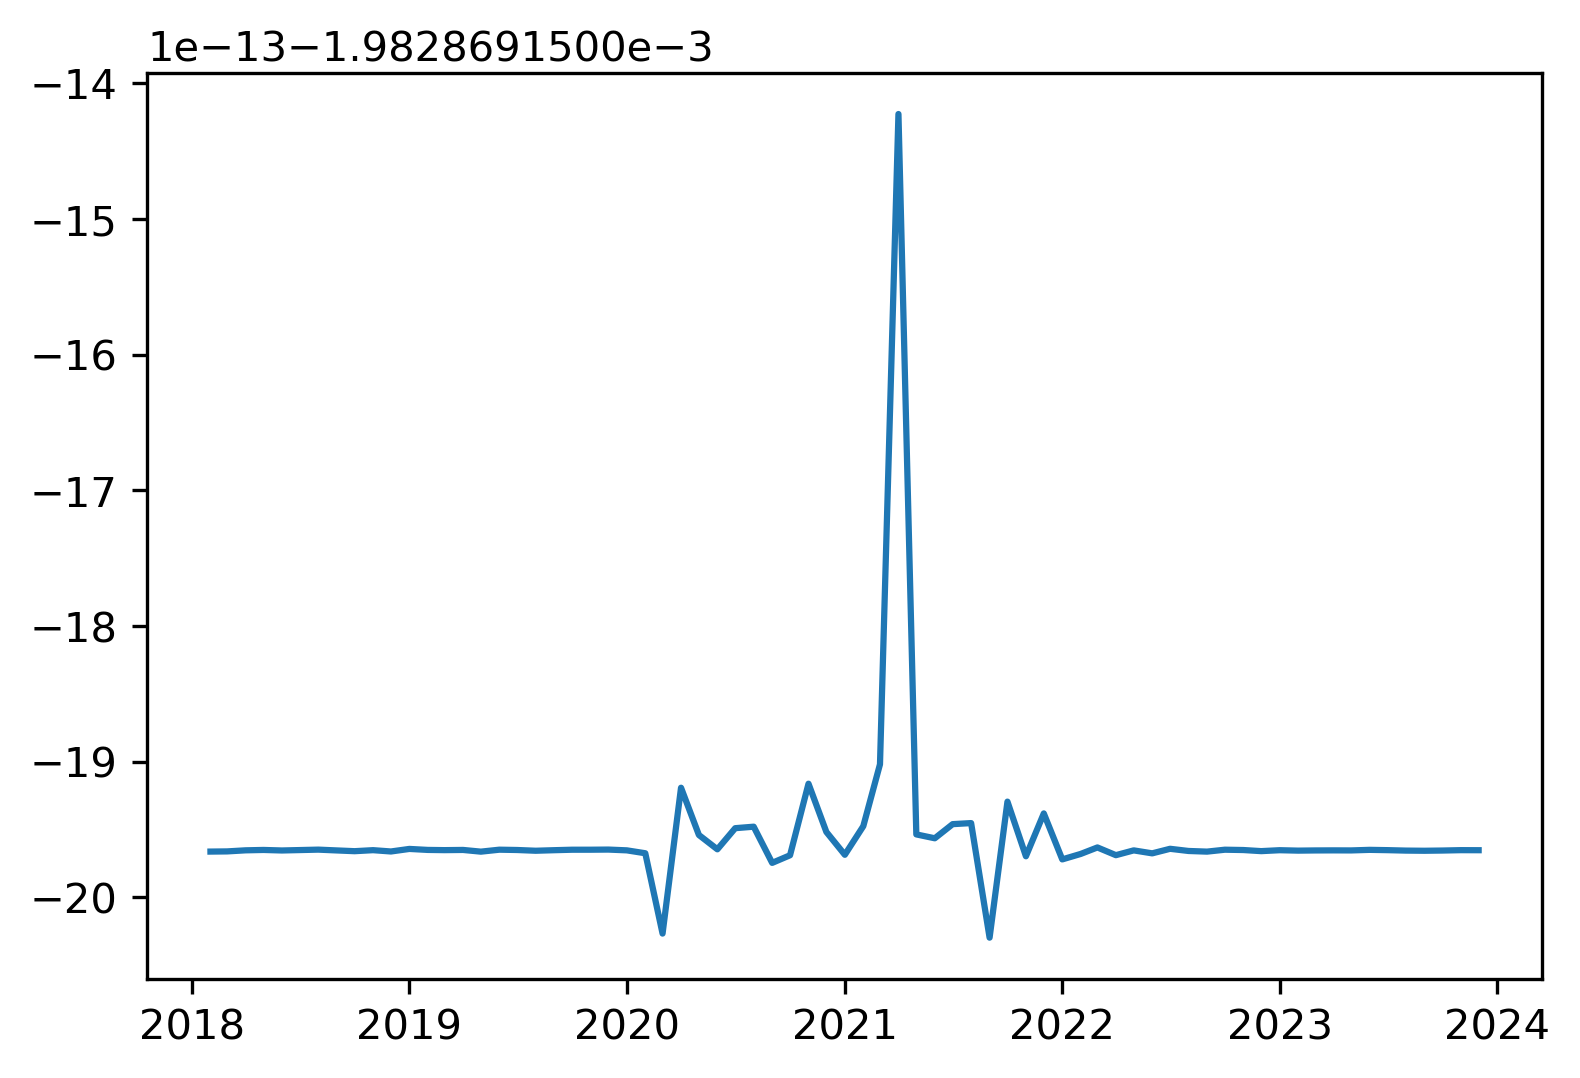

In [260]:
plt.figure(dpi=300)

plt.plot(weights["NVDA"])

In [217]:
print(np.array(PI)[i] for i in range(np.shape(stocks)[1]))

for i in range(np.shape(stocks)[1]):
    print(np.array(PI)[i] )

<generator object <genexpr> at 0x7f4e5502ae30>
[-4.16925299e-02 -6.48393658e-02 -4.96269762e-02 -1.23121158e-02
 -2.10202291e-02 -1.73754063e-02 -4.60572454e-02 -5.08152911e-02
 -4.47918475e-02 -2.45577711e-02 -2.79402684e-02 -5.98090681e-02
 -7.70403867e-03 -7.72910076e-03 -3.64669849e-02 -2.87949022e-02
 -4.34908301e-02 -1.17135754e-02 -1.85113290e-02 -2.31009467e-02
 -6.62101277e-02 -7.52738749e-02 -1.16904419e-02 -4.30014873e-02
 -6.48017380e-02 -2.66269897e-02 -8.56133216e-02 -4.68010034e-02
 -1.46711567e-02 -6.00434109e-02 -1.73939157e-02 -4.70894221e-02
 -4.39534400e-02 -4.74468318e-02 -2.80372663e-02 -4.91102271e-02
 -1.52716874e-01 -2.75305148e-02 -4.99678350e-02 -8.49514937e-02
 -3.95945474e-02 -1.55969850e-02 -3.37777750e-02 -4.32539758e-02
 -3.61579525e-02 -1.59351439e-02 -2.72832033e-02 -4.74960661e-02
 -1.91052562e-02 -6.09192239e-02 -5.80889902e-02 -2.77199528e-02
 -1.86492177e-02 -7.57423506e-02 -6.40583924e-02 -1.35392498e-02
 -5.58578541e-02 -1.65920891e-02  3.1117695

IndexError: index 71 is out of bounds for axis 0 with size 71

In [221]:
pd.DataFrame({PI.iloc[i].name: np.linalg.inv(SIGMA).dot(np.array(PI)[i]) for i in range(np.shape(stocks)[0])})

,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
0,-6.960838e+15,-7.184548e+15,-7.584646e+15,-8.044974e+15,-8.087995e+15,-8.539718e+15,-8.840867e+15,-9.249569e+15,-9.800241e+15,-9.929305e+15,...,-1.972524e+16,-2.117936e+16,-2.257755e+16,-2.216885e+16,-2.257755e+16,-2.279266e+16,-2.280126e+16,-2.288731e+16,-2.253453e+16,-2.228501e+16
1,7.226522e+14,7.458771e+14,7.874140e+14,8.352037e+14,8.396700e+14,8.865665e+14,9.178309e+14,9.602610e+14,1.017430e+15,1.030829e+15,...,2.047812e+15,2.198774e+15,2.343930e+15,2.301500e+15,2.343930e+15,2.366262e+15,2.367155e+15,2.376088e+15,2.339464e+15,2.313559e+15
2,-5.648703e+15,-5.830244e+15,-6.154922e+15,-6.528477e+15,-6.563388e+15,-6.929961e+15,-7.174342e+15,-7.506003e+15,-7.952872e+15,-8.057607e+15,...,-1.600699e+16,-1.718700e+16,-1.832163e+16,-1.798997e+16,-1.832163e+16,-1.849619e+16,-1.850317e+16,-1.857299e+16,-1.828672e+16,-1.808423e+16
3,-1.029553e+16,-1.062642e+16,-1.121819e+16,-1.189904e+16,-1.196267e+16,-1.263080e+16,-1.307622e+16,-1.368072e+16,-1.449520e+16,-1.468609e+16,...,-2.917492e+16,-3.132565e+16,-3.339367e+16,-3.278917e+16,-3.339367e+16,-3.371183e+16,-3.372455e+16,-3.385182e+16,-3.333004e+16,-3.296098e+16
4,1.064240e+16,1.098443e+16,1.159613e+16,1.229993e+16,1.236570e+16,1.305634e+16,1.351676e+16,1.414163e+16,1.498355e+16,1.518087e+16,...,3.015784e+16,3.238103e+16,3.451872e+16,3.389386e+16,3.451872e+16,3.484759e+16,3.486075e+16,3.499230e+16,3.445295e+16,3.407145e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,-1.888596e+15,-1.949293e+15,-2.057846e+15,-2.182741e+15,-2.194413e+15,-2.316974e+15,-2.398681e+15,-2.509569e+15,-2.658975e+15,-2.693993e+15,...,-5.351801e+15,-5.746328e+15,-6.125682e+15,-6.014793e+15,-6.125682e+15,-6.184043e+15,-6.186378e+15,-6.209723e+15,-6.114009e+15,-6.046309e+15
484,2.995769e+15,3.092048e+15,3.264240e+15,3.462354e+15,3.480869e+15,3.675279e+15,3.804886e+15,3.980781e+15,4.217776e+15,4.273322e+15,...,8.489247e+15,9.115062e+15,9.716808e+15,9.540913e+15,9.716808e+15,9.809384e+15,9.813088e+15,9.850118e+15,9.698293e+15,9.590904e+15
485,1.207381e+14,1.246185e+14,1.315583e+14,1.395429e+14,1.402891e+14,1.481244e+14,1.533479e+14,1.604370e+14,1.699886e+14,1.722272e+14,...,3.421412e+14,3.673633e+14,3.916155e+14,3.845264e+14,3.916155e+14,3.953465e+14,3.954958e+14,3.969882e+14,3.908692e+14,3.865412e+14
486,-8.442213e+14,-8.713532e+14,-9.198777e+14,-9.757069e+14,-9.809246e+14,-1.035710e+15,-1.072234e+15,-1.121802e+15,-1.188588e+15,-1.204242e+15,...,-2.392308e+15,-2.568666e+15,-2.738241e+15,-2.688673e+15,-2.738241e+15,-2.764329e+15,-2.765373e+15,-2.775808e+15,-2.733023e+15,-2.702760e+15


In [180]:
betas["AAPL"]

Date
2018-02-01    1.252492
2018-03-01    1.252492
2018-04-01    1.252492
2018-05-01    1.252492
2018-06-01    1.252492
                ...   
2023-08-01    1.252492
2023-09-01    1.252492
2023-10-01    1.252492
2023-11-01    1.252492
2023-12-01    1.252492
Name: AAPL, Length: 71, dtype: float64

In [58]:
import pandas as pd

# Sample date&time variable
date_time_var = '2022-06-18 10:30:00'

# Convert to Pandas datetime object
date_time_obj = pd.to_datetime(date_time_var)

# Remove time from the datetime object
date_var = date_time_obj.date()

# Convert the date object to a string
date_str = date_var.strftime('%Y-%m-%d')

print(date_str)


2022-06-18


In [171]:
stocks

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-01,-0.065913,-0.001289,0.063847,0.039573,-0.024799,-0.029690,0.001929,0.046906,-0.018829,-0.033295,...,0.011535,-0.051709,-0.132417,-0.078112,0.032106,-0.037947,-0.085510,0.121630,0.017398,0.055557
2018-03-01,-0.024639,-0.040370,-0.054210,-0.182854,-0.006796,-0.030032,-0.046643,0.033233,0.010871,0.052720,...,0.092032,0.050832,-0.004846,-0.102569,0.034361,0.050926,-0.062022,0.007601,-0.037043,0.032773
2018-04-01,-0.017339,-0.173787,-0.015020,0.020074,-0.029873,-0.063793,-0.014984,0.025546,-0.036492,0.046345,...,0.021003,0.038977,0.042085,0.002359,-0.052262,0.023141,0.058560,-0.031324,0.038309,-0.000359
2018-05-01,-0.056005,0.014209,0.130764,0.035368,0.063585,-0.020966,0.039116,0.124910,0.112536,-0.036580,...,0.052742,-0.028181,0.044888,-0.129718,-0.034294,-0.066246,-0.031779,0.138545,0.001096,0.004107
2018-06-01,-0.001292,-0.126119,-0.005598,-0.063574,-0.008776,0.011855,0.050405,-0.021943,-0.012966,0.056229,...,-0.142901,0.003515,0.028662,-0.000913,-0.040101,-0.034080,-0.000628,-0.066836,-0.034673,0.017802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-0.005748,-0.120597,-0.043675,-0.006624,-0.071288,-0.010684,0.027169,0.024113,-0.088959,-0.066620,...,-0.069738,-0.089271,0.036833,-0.106696,-0.081685,-0.060216,-0.137749,-0.106994,-0.071895,0.015094
2023-09-01,-0.076402,-0.130346,-0.087448,0.014290,-0.058795,0.037080,-0.051456,-0.088390,-0.036803,-0.043863,...,-0.086069,0.001575,0.066138,-0.078997,-0.117977,-0.029793,-0.057925,-0.139922,-0.005774,-0.086767
2023-10-01,-0.075568,-0.129586,-0.002570,-0.052865,-0.023748,0.087442,-0.032627,0.043460,-0.097162,-0.051047,...,-0.050103,0.045176,-0.099762,-0.106109,0.027573,-0.032656,-0.067575,-0.114573,-0.115792,-0.097597


In [71]:
# stocks.index.values

[i.date().strftime('%Y-%m-%d') for i in stocks.index.values]

['2020-01-01',
 '2020-02-01',
 '2020-03-01',
 '2020-04-01',
 '2020-05-01',
 '2020-06-01',
 '2020-07-01',
 '2020-08-01',
 '2020-09-01',
 '2020-10-01',
 '2020-11-01',
 '2020-12-01',
 '2021-01-01',
 '2021-02-01',
 '2021-03-01',
 '2021-04-01',
 '2021-05-01',
 '2021-06-01',
 '2021-07-01',
 '2021-08-01',
 '2021-09-01',
 '2021-10-01',
 '2021-11-01',
 '2021-12-01',
 '2022-01-01',
 '2022-02-01',
 '2022-03-01',
 '2022-04-01',
 '2022-05-01',
 '2022-06-01',
 '2022-07-01',
 '2022-08-01',
 '2022-09-01',
 '2022-10-01',
 '2022-11-01',
 '2022-12-01',
 '2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01']

In [4]:
def ExpectedReturn(df_vix, df_riskFreeRate, date='2022-01-03'):
    # Function to calculate expected reutrn based on equation (15) in Ian Martin 2017 paper
    # Parameters:
    #   - df_vix: DataFrame containing the pre-calculated SVIX data
    #   - df_riskFreeRate: Risk-free interest rate (e.g. 3 month T-bill)
    #   - date: Date for which risk aversion is calculated (default: '2022-01-03')
    # Returns:
    #   - Expected Return

    rf_at_date = df_riskFreeRate.loc[df_riskFreeRate['MCALDT']==datetime.strptime(date, "%Y-%m-%d"), 'TMYTM'].values

    # It is useful to include the ITEMID caldt(mcaldt), or altdt(maltdt) for partial period data in the output file, 
    #   to see the actual dates for each entity when using relative dates.
    #   https://www.crsp.uchicago.edu/products/documentation/date-keywords-and-usage
    
    vix_at_date = df_vix.loc[df_vix['Date']==datetime.strptime(date, "%Y-%m-%d"), 'vix'].values
    return np.exp(rf_at_date/100/12) * (vix_at_date/100)**2